# From deterministic chaos to quantum chaos - 2019-03-08

1. Modeling and simulating quantum mechanical systems
2. Chaotic classical dynamics
3. Standard map
4. Quantum kinematics, quantum dynamics

There was little progress in *inhomogeneous systems* before computer modeling! Analytic methods don't handle inhomogeneity well.

1. Deterministic chaos -> Quantum chaos
2. Inhomogeneous systems -> Random wave function interference
3. Equilibrium MC, MD simulations -> Path integral MC simulations

Michael Berry - one of the parents of quantum chaos

# Quantum chaos

Quantum system with a chaotic dynamics in the classical limit. Simplest models: quantum billards and the **quantum map** (this lab!)

Quantum particle in a billard

# Classical mechanics

Poincare and the mathematical foundations of chaos theory

## Conditions for chaos

* exponential sensitivity to small changes of initial conditions
* Limited available phase space (for *mixing*)

(shoutout to Predrag Cvetanovic's Chaos Book!)

## Lyapunov exponent

Easier found from matrix elements of linearized problem

### Lyapunov time

$$ T \approx - \lambda^{-1} \ln | \delta x / L | $$

## Bunimovich stadium

Has almost-everywhere-positive Lyapunov exponent

In [2]:
def trajectory(t, r, v):
    return r + t * v

def border_func(r, R = 0):
    x, y = r
    return x**2 + y ** 2 != R

def detect_collision(r, v, border_func):
    # find r' = r + v * t where border_func = 0, t being a linear parameter
    pass

## Angle-perimeter map

Incident angle to the boundary vs point on the perimeter (arc length)

## [Kicked rotator model](https://en.wikipedia.org/wiki/Kicked_rotator)

Prototype model for (quantum) chaos

A rotating rod fixed at one end with periodic electric field perturbation:

$$ \mathcal{H}(p,x,t)= \frac{1}{2}p^2 + K \cos(x) \sum_{n=-\infty}^\infty \delta(t-n) $$

$\cos(x)$ being the dot product $\vec{E} \cdot \vec{r}$.

We use generalized momentum and position $J, \theta$. After every kick the angular momentum is updated: $J \to J'$, $\theta$ remaining constant. It rotates, so we can just go to $\theta \to \theta' = \theta + \tau_0 J' / I_0$.

Translated into a map called the Standard Map (Chirikov Map, after Boris Valerianovich Chirikov):

$$ p_{n+1}=p_n+K\sin(x_n),\; \; x_{n+1}=x_n+p_{n+1} $$

At $K = 0$ the system is exactly integrable and consists of simple horizontal lines in phase space

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

def iterate(r, K):
    x, p = r
    pnext = p + K * np.sin(x)
    xnext = (x + pnext) % (2 * np.pi)
    return [xnext, pnext]

def run(K, N, x, p):
    r = np.array((x, p))
    snapshots = [r]
    for i in range(N):
        snapshots.append(iterate(snapshots[-1], K))
    snapshots = np.array(snapshots)
    return snapshots

def random_color():
    return np.random.random(3)

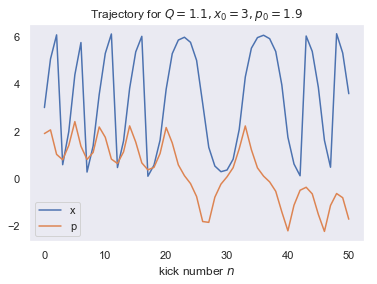

In [4]:
snapshots = run(1.1, 50, 3, 1.9)
x, p = snapshots.T
plt.title(r"Trajectory for $Q = 1.1, x_0 = 3, p_0 = 1.9$ ")
plt.plot(x, label="x")
plt.plot(p, label="p")
plt.xlabel("kick number $n$")
plt.legend(loc='best')
plt.grid()

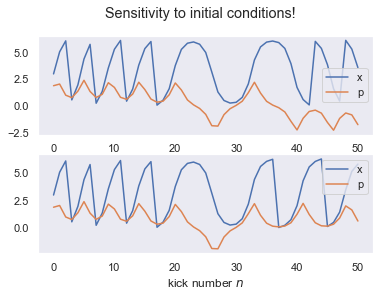

In [5]:
fig, axes = plt.subplots(2)
ICs = [(3, 1.9), (3, 1.90001)]
fig.suptitle("Sensitivity to initial conditions!")
for ax, (xI, pI) in zip(axes, ICs):
    x, p = run(1.1, 50, xI, pI).T
    ax.plot(x, label="x")
    ax.plot(p, label="p")
    ax.set_xlabel("kick number $n$")
    ax.legend(loc='best')
    ax.grid()

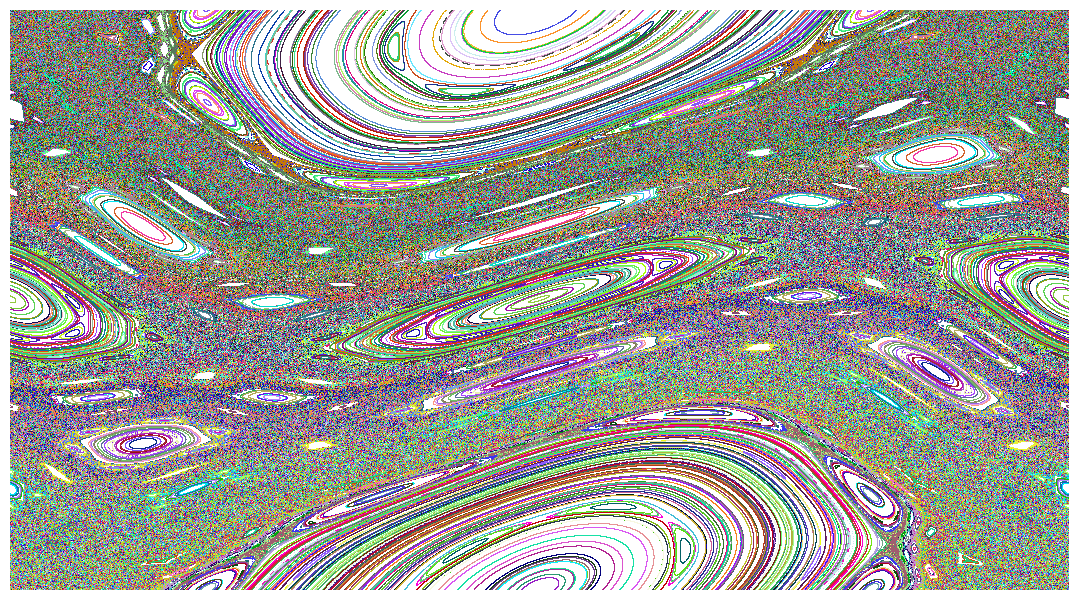

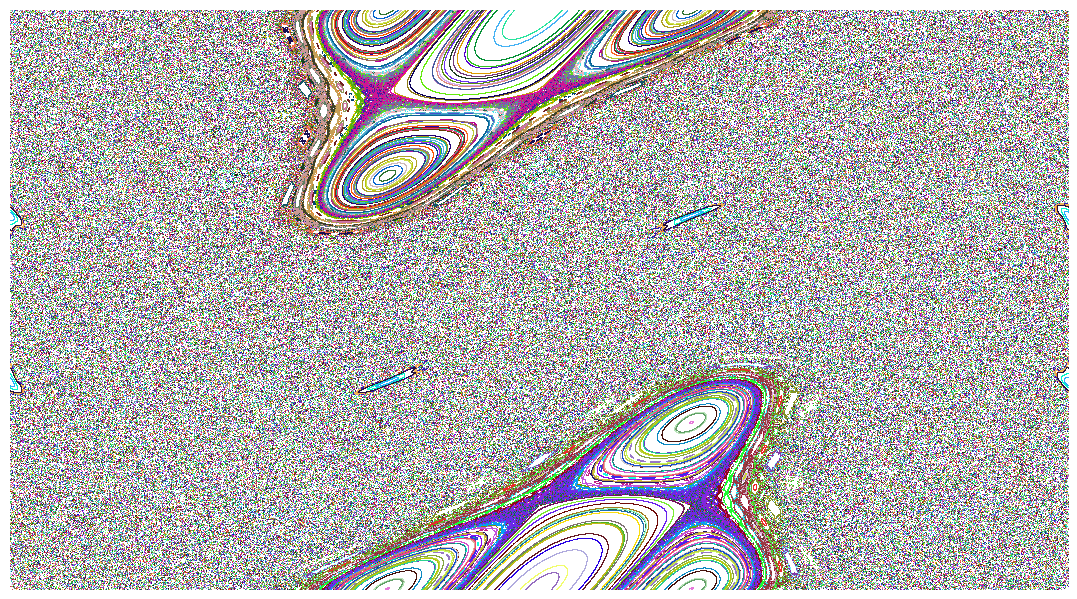

In [29]:
PERIODIC_P = False
def plot(snapshots, K=None):
    x, p = snapshots.T
    x = x % (2 * np.pi)
    plt.plot(x, p, ",", alpha=1, color = random_color())
    plt.xlim(0, 2*np.pi)
    plt.ylim(0, 2*np.pi)
    plt.xlabel("x")
    plt.ylabel("p")
    if K is not None:
        plt.title(f"Phase space trajectory for K = {K}")
        
K_values = [
    1.1,
    2.3,
#     5.7,
   ]
np.random.seed(777)

for K in K_values:
    fig = plt.figure(figsize=(1366/96, 768/96), dpi=96)
    plt.axis('off')
    fig.axes[0].xaxis.set_visible(False)
    fig.axes[0].yaxis.set_visible(False)
    for x, p in np.random.random((1000, 2)) * 2 * np.pi:
        plot(run(K, 10000, x, p), None)
    plt.savefig(f"{K:.2f}.png",
               bbox_inches='tight',
               pad_inches=0,
               dpi=200,
               )
    plt.show()

In [ ]:
plt.savefig

In [6]:
K = 0
for x, p in np.random.random((100, 2)) * 2 * np.pi:
    plot(run(K, 1000, x, p), K)

NameError: name 'plot' is not defined

# Kicked top
https://arxiv.org/pdf/1806.06184.pdf

In [107]:
from numpy import cos, sin
def top_iterate(r, k, p):
    x, y, z = r
    nawias1 = x * cos(p) + z * sin(p)
    nawias2 = k * (z * cos(p) - x * sin(p))
    
    xnext = nawias1 * cos(nawias2) - y * sin(nawias2)
    ynext = nawias1 * sin(nawias2) + y * cos(nawias2)
    znext = -x * sin(p) + z * cos(p)
    return [xnext, ynext, znext]

def top_run(K, p, N, x, y, z):
    r = np.array((x, y, z))
    snapshots = [r]
    for i in range(N):
        snapshots.append(top_iterate(snapshots[-1], K, p))
    snapshots = np.array(snapshots)
    X, Y, Z = snapshots.T
    theta = np.arccos(Z)
    phi = np.arctan2(Y, X)
    return theta, phi

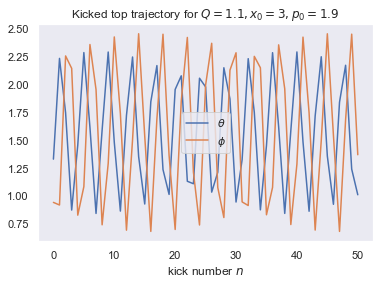

In [108]:
phi = np.random.random() * 2 * np.pi
theta = np.random.random() * np.pi
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

theta, phi = top_run(1.1, 2.0, 50, x, y, z)
plt.title(r"Kicked top trajectory for $Q = 1.1, x_0 = 3, p_0 = 1.9$ ")
plt.plot(theta, label=r"$\theta$")
plt.plot(phi, label=r"$\phi$")
plt.xlabel("kick number $n$")
plt.legend(loc='best')
plt.grid()

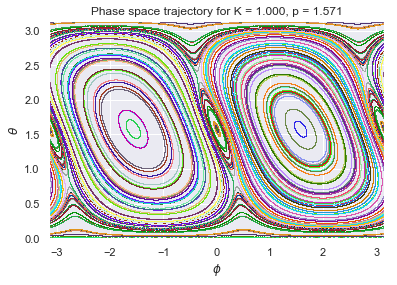

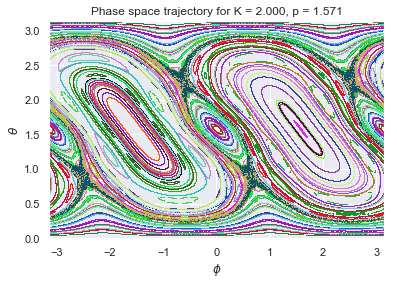

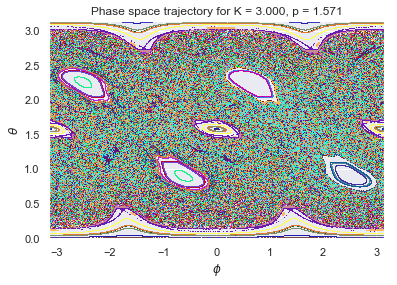

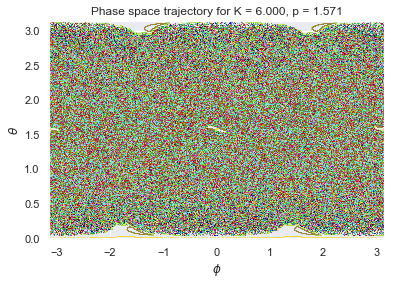

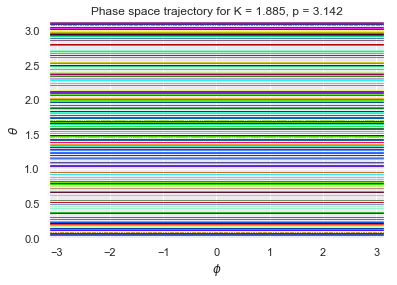

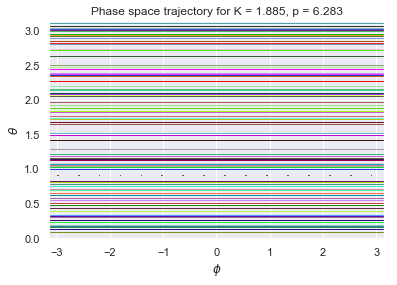

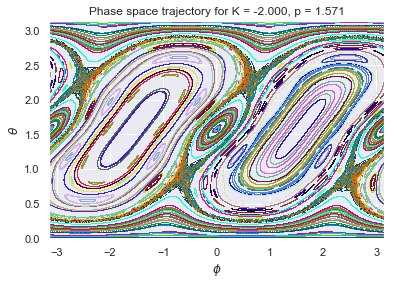

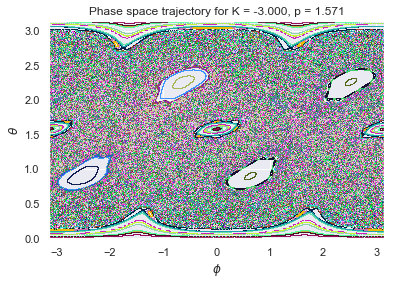

In [110]:
from math import pi

def top_plot(snapshots, params=None):
    theta, phi = snapshots
    plt.plot(phi, theta, ",", alpha=1, color = random_color())
    plt.xlim(-pi, pi)
    plt.ylim(0, pi)
    plt.xlabel(r"$\phi$")
    plt.ylabel(r"$\theta$")
    if params is not None:
        K, p = params
        plt.title(f"Phase space trajectory for K = {K:.3f}, p = {p:.3f}")
        
params = [
    (pi/2, 1),
    (pi/2, 2),
    (pi/2, 3),
    (pi/2, 6),
    (pi, 3 * pi / 5),
    (2 * pi, 3 * pi / 5),
    (pi/2, -2),
    (pi/2, -3),
]
for p, K in params:
    plt.figure()
    for trajectory_number in range(100):
        phi = np.random.random() * 2 * np.pi - pi
        theta = np.random.random() * np.pi
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)    
        top_plot(top_run(K, p, 10000, x, y, z), (K, p))
    plt.show()

# Quantizing the system - quantum map

$$ [\theta, J] = i \hbar $$

Formal structure for solution:

$$\psi(t) = F(t) \psi(0) $$

$$ F(t) = T \{ \exp[-i \int H(t) dt / h_{eff} ] \} $$

But our kicks are stroboscopic, so F simpliefies by a good bunch.

We use the fact that x is periodic, so we have discreteness in the system....

$ h_{eff} = 2 \pi / M $ for M even gives us periodicity.

So we can just get an M by M evolution matrix that evolves the whole system. Awesome.